# Predicting house price in Bangalore

In [109]:
# importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [110]:
# read file
df = pd.read_csv('./data/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [111]:
print(f'No. of rows and colummns {df.shape}')

No. of rows and colummns (13320, 9)


In [112]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object


    bath      ---      float64 

    balcony     ---    float64

    price       ---    float64


This three feature already in desired format.

    size       ---      object

    total_sqft  ---     object

We need change type of this two feature.

In [113]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [114]:
c_feature = ['area_type', 'availability', 'location','society']

In [115]:
for f in c_feature:
    print(f'{f} : {df[f].nunique()} : {df[f].unique()}\n')

area_type : 4 : ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']

availability : 81 : ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']

location : 1305 : ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd sta

Need to simplipy 'availability' 'location' in feature engineering. also drop 'society' column.

In [116]:
# calculating duplicate value
df.duplicated().sum()

529

In [117]:
# removing duplicate value
df = df.drop_duplicates()

In [118]:
df.shape

(12791, 9)

In [119]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

Have to fill missing value in bath, balcony. That can be done by group by mean with 'size'.

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


In [121]:
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


Before further analysis we have to process data column in correct format

In [122]:
df_nft = df.copy()

In [123]:
def mysplit(s):
    '''
    value which is in correct conditon, can be copnvert easily ,
    replacing them with None to other value and learn about their format
    '''
    try:
        float(s)
    except:
        return s
    return np.nan
    
df_nft['total_area'] = df_nft['total_sqft'].apply(mysplit) 
df_nft['total_area'].unique()

array([nan, '2100 - 2850', '3010 - 3410', '2957 - 3450', '3067 - 8156',
       '1042 - 1105', '1145 - 1340', '1015 - 1540', '1520 - 1740',
       '34.46Sq. Meter', '1195 - 1440', '1200 - 2400', '4125Perch',
       '1120 - 1145', '4400 - 6640', '3090 - 5002', '4400 - 6800',
       '1160 - 1195', '1000Sq. Meter', '4000 - 5249', '1115 - 1130',
       '1100Sq. Yards', '520 - 645', '1000 - 1285', '3606 - 5091',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '1440 - 1884', '716Sq. Meter',
       '547.34 - 827.31', '580 - 650', '3425 - 3435', '1804 - 2273',
       '3630 - 3800', '660 - 670', '1500Sq. Meter', '620 - 933',
       '142.61Sq. Meter', '2695 - 2940', '2000 - 5634', '1574Sq. Yards',
       '3450 - 3472', '1250 - 1305', '670 - 980', '1005.03 - 1252.49',
       '1004 - 1204', '361.33Sq. Yards', '645 - 936', '2710 - 3360',
       '2249.81 - 4112.19', '3436 - 3643', '2830 - 2882', '596 - 804',
       '1255 - 1863', '1300 - 1405

Apart from float value , in some column showing a range(ex: '2528 - 3188') and some column filled with unit name which is not sqft (ex:  '142.84Sq. Meter')
for 1st type we will calculate the mean value of that range and for 2nd type we convert those value in sqft.

In [124]:
# converting range value
def convert(cell):
    unit_v = {'Sq. Meter':10.7639, 'Perch':272.25, 'Sq. Yards': 9, 
          'Acres': 43560, 'Cents' : 435.56, 'Guntha' : 1089,
          'Grounds' : 2400
         }
    lst =cell.split(' - ')
    if len(lst)==2:
        return np.average([float(a) for a in lst])
    try:
        return float(cell)
    except:
        tail = cell.lstrip('0123456789.')  
        sqft = float(cell.strip(tail)) * unit_v[tail]
        return str(sqft)

         
df['total_sqft'] = df['total_sqft'].apply(convert)

In [125]:
df['total_sqft'] = df['total_sqft'].astype('float64')

In [126]:
# removing all words contains in this section
df['size'] = df['size'].str.split(' ').str[0]
df['size'] = df['size'].astype('float64')

Converted all variable into float type. Now let's recheck to our column type.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  float64
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  float64
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(5), object(4)
memory usage: 999.3+ KB


In [128]:
# dropping society column
df.drop(['society','balcony'], axis=1, inplace=True)

df.describe()

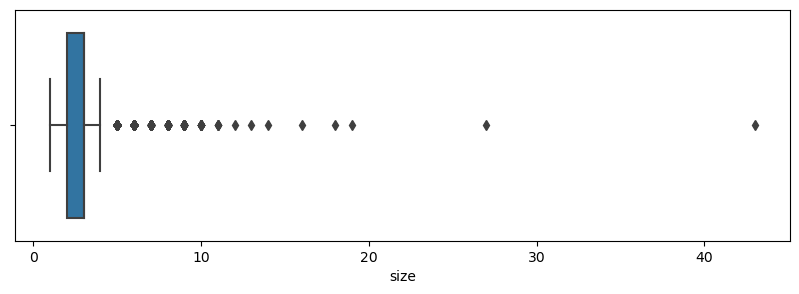

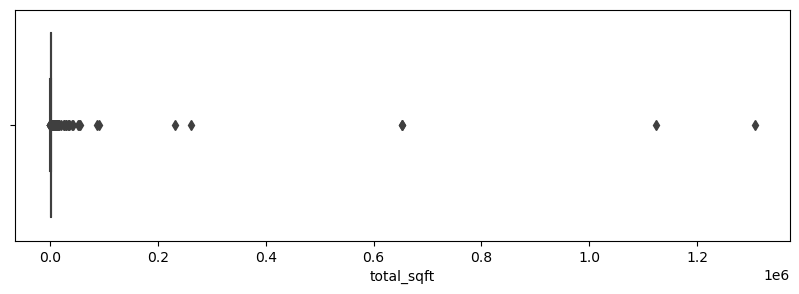

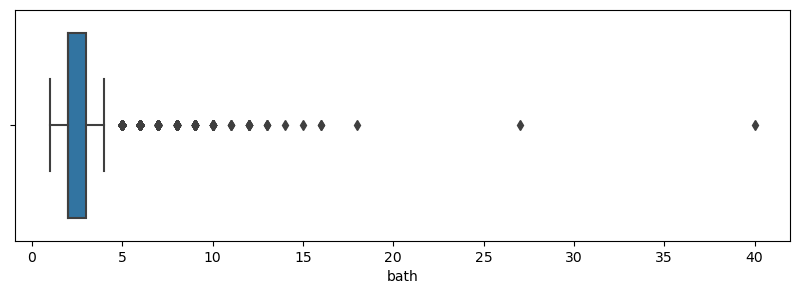

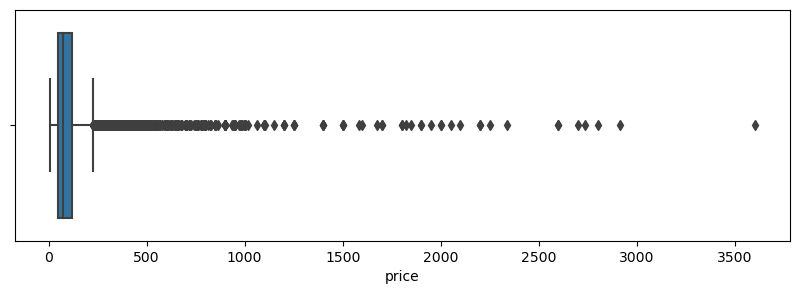

In [129]:
n_feature = [a for a in df.columns if a not in c_feature]
for f in n_feature:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=df[f])
    plt.show()

outliers range is very high. We can use 4 std variation to handle outlier.

__Distribution of values__

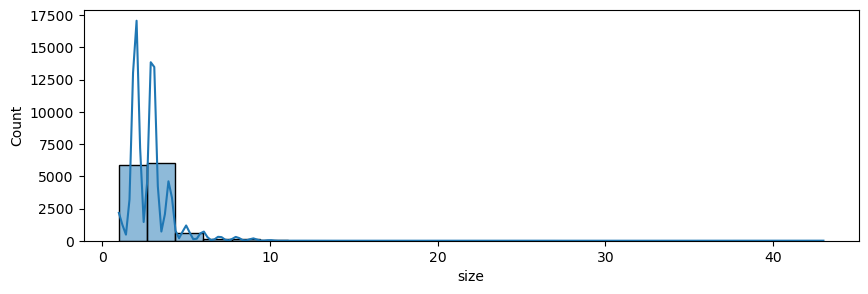

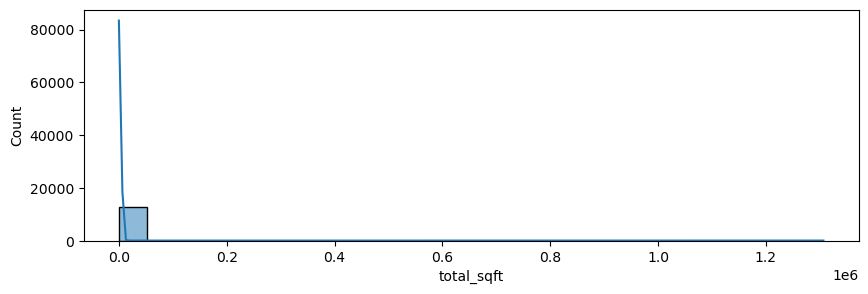

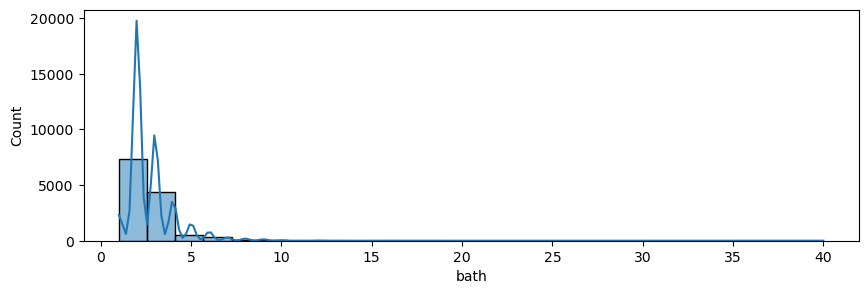

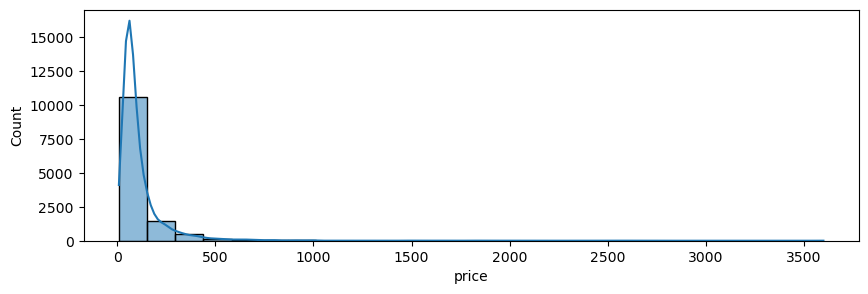

In [130]:
for f in n_feature:
    plt.figure(figsize=(10,3))
    sns.histplot(x=df[f], bins=25, kde=True)
    plt.show()

Distribution is not normal. should use boxcox method to normalize

In [131]:
c_feature 

['area_type', 'availability', 'location', 'society']

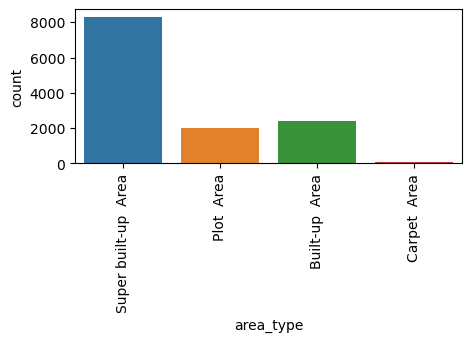

In [132]:
plt.figure(figsize=(5,2))
sns.countplot(x=df['area_type'])
plt.xticks(rotation=90)
plt.show()

### FE

### Outlier Handling

In [133]:
q1 = df.price.quantile(.25)
q3 = df.price.quantile(.75)

iqr = q3 - q1

In [134]:
l_fence = q1 - (1.5 * iqr)
u_fence = q3 + (1.5 * iqr)

In [135]:
u_fence,l_fence

(227.5, -56.5)

price can not be less than 0. so adjust l_fence = 0 

In [136]:
l_fence = 0

In [137]:
df = df[(df.price > l_fence )& (df.price <= u_fence)]

In [138]:
df.shape

(11534, 7)

In [139]:
q1 = df.total_sqft.quantile(.25)
q3 = df.total_sqft.quantile(.75)

iqr = q3 - q1

In [140]:
l_fence = q1 - (1.5 * iqr)
u_fence = q3 + (1.5 * iqr)
u_fence,l_fence

(2280.0, 360.0)

In [141]:
df = df[(df.total_sqft > l_fence )& (df.total_sqft <= u_fence)]
df.shape

(10845, 7)

In [142]:
df['size'] = df['size'].fillna(df['size'].mode())
df['size'] = df['size'].astype('float64')

In [143]:
q1 = df['size'].quantile(.25)
q3 = df['size'].quantile(.75)

iqr = q3 - q1

In [144]:
l_fence = q1 - (1.5 * iqr)
u_fence = q3 + (1.5 * iqr)
u_fence,l_fence

(4.5, 0.5)

In [145]:
df = df[(df['size'] > l_fence )& (df['size'] <= u_fence)]
df.shape

(10425, 7)

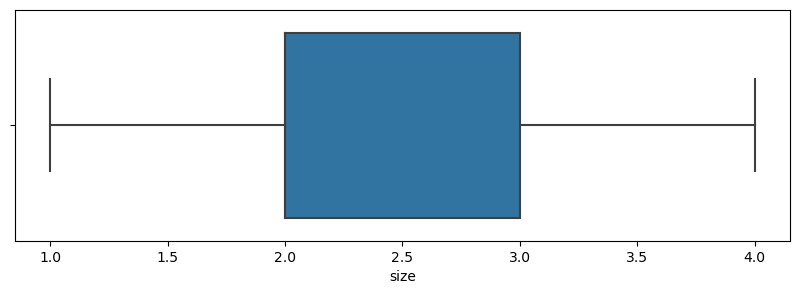

In [146]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['size'])
plt.show()

In [147]:
from sklearn.model_selection import train_test_split

X = df[['total_sqft','size']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [148]:
x_train

,total_sqft,size
12630,1057.0,2.0
2611,1164.0,2.0
7391,1565.0,3.0
11557,1128.0,2.0
2425,990.0,2.0
...,...,...
7431,1125.0,2.0
9777,1315.0,2.0
9593,1278.0,3.0
1175,1500.0,3.0


In [149]:
reg = linear_model.LinearRegression()

In [150]:
reg.fit(x_train,y_train)

LinearRegression()

In [151]:
reg.predict(x_test)

array([ 26.04447267, 113.8267068 ,  63.76591532, ...,  75.02557113,
       107.1943068 ,  60.68107811])

In [152]:
reg.score(x_test, y_test)

0.45079188116701585

We only used two feature to predict label. When we add more feature to model accuracy will increased.

## One Hot Coding

In [153]:
# simplipying avaibility column
def chng(row):
    if row == 'Ready To Move' or row == 'Immediate Possession':
        row = '1'
    else:
        row = '0'
    return row
    
df['availability'] = df['availability'].apply(chng)

In [154]:
df['availability'].unique()

array(['0', '1'], dtype=object)

In [155]:
df['availability'] = df['availability'].map(lambda x: True if x=='1' else False)

In [156]:
df['availability'].unique()

array([False,  True])

In [157]:
df['availability'].dtypes

dtype('bool')

In [158]:
X2 = df[['total_sqft','size','availability']]
y2 = df['price']

x2_train, x2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3)

In [159]:
reg2 = linear_model.LinearRegression()
reg2.fit(x2_train,y2_train)

LinearRegression()

In [160]:
reg2.score(x2_test, y2_test)

0.43075349559047427

In [161]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'price'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='area_type'>

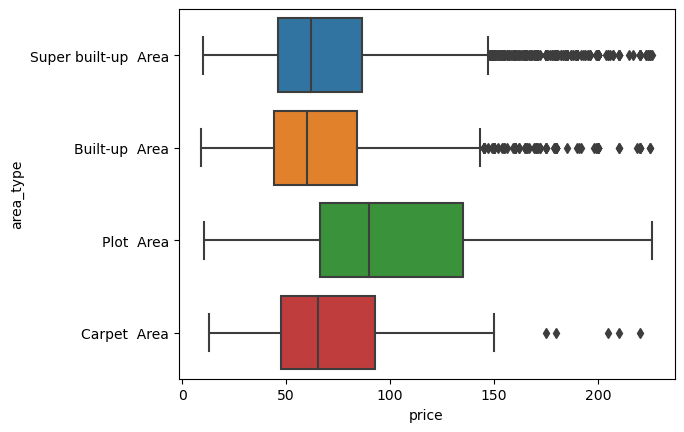

In [162]:
sns.boxplot(x=df['price'], y=df['area_type'])

In [163]:
location_stats = df['location'].value_counts()

In [164]:
location_stats[location_stats <= 10].sum()

2433

In [165]:
l_less_10 = location_stats[location_stats <= 10]

In [166]:
df['location'] =  df['location'].apply(lambda x: 'other' if x in l_less_10 else x)

In [167]:
dummy = pd.get_dummies(df['location'])

In [168]:
df = pd.concat([df,dummy], axis='columns')

In [169]:
df = df.drop('location',axis='columns')

In [170]:
dm2 = pd.get_dummies(df['area_type'])

In [171]:
df = pd.concat([df,dm2], axis='columns')

In [172]:
y3 = df['price']

In [173]:
x4 = df.drop('price',axis='columns')

In [174]:
x3 = df.drop('area_type',axis='columns')

In [175]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.2)

In [176]:
reg3 = linear_model.LinearRegression()
reg3.fit(x3_train,y3_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
x3_train